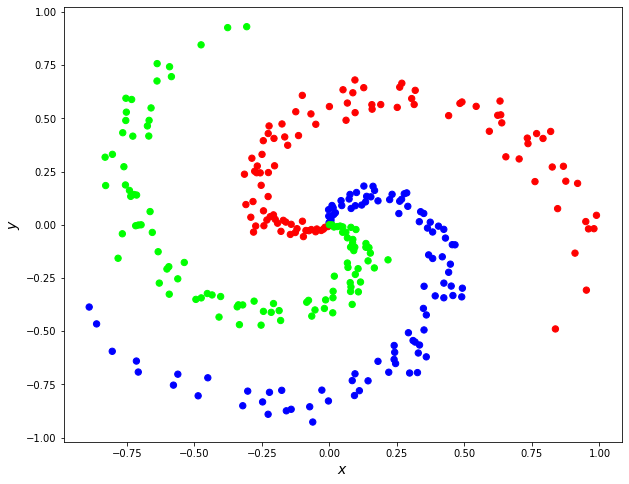

In [84]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

import torch

N = 100
D = 2
K = 3
X = np.zeros((N * K, D))
y = np.zeros(N * K, dtype='int64')

for j in range(K):
    ix = range(N * j,N * (j + 1))
    r = np.linspace(0.0, 1, N)
    t = np.linspace(j * 4, (j + 1) * 4,N) + np.random.randn(N) * 0.2
    X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
    y[ix] = j

plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.brg)
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.show();

In [85]:
# from numpy import numpy as np
X = torch.autograd.Variable(torch.FloatTensor(X))
y = torch.autograd.Variable(torch.LongTensor(y))
print(X.data.shape, y.data.shape)

torch.Size([300, 2]) torch.Size([300])


In [86]:
ndim_in = 2 # размерность входа (то есть количество признаков)
ndim_out = 3 # размерность выходного слоя (то есть количество классов)
num_epochs = 900#
learning_rate = 0.005#

neuron = torch.nn.Sequential(
    torch.nn.Linear(ndim_in, ndim_out),
)

loss_fn = torch.nn.CrossEntropyLoss()#

optimizer = torch.optim.SGD(neuron.parameters(), lr=learning_rate)#

for i in range(num_epochs):
    y_pred = neuron(X)

    loss = loss_fn(y_pred, y)
    print(f'Iter: {i} -> Loss: {loss.data}')

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

372 -> Loss: 0.9619777202606201
Iter: 373 -> Loss: 0.9618653655052185
Iter: 374 -> Loss: 0.9617522954940796
Iter: 375 -> Loss: 0.9616395235061646
Iter: 376 -> Loss: 0.9615277051925659
Iter: 377 -> Loss: 0.9614149928092957
Iter: 378 -> Loss: 0.9613031148910522
Iter: 379 -> Loss: 0.9611912965774536
Iter: 380 -> Loss: 0.9610790014266968
Iter: 381 -> Loss: 0.9609670042991638
Iter: 382 -> Loss: 0.9608556032180786
Iter: 383 -> Loss: 0.9607447385787964
Iter: 384 -> Loss: 0.9606331586837769
Iter: 385 -> Loss: 0.9605221748352051
Iter: 386 -> Loss: 0.9604113698005676
Iter: 387 -> Loss: 0.9603002667427063
Iter: 388 -> Loss: 0.9601899981498718
Iter: 389 -> Loss: 0.9600791335105896
Iter: 390 -> Loss: 0.9599687457084656
Iter: 391 -> Loss: 0.9598581194877625
Iter: 392 -> Loss: 0.9597483277320862
Iter: 393 -> Loss: 0.9596385955810547
Iter: 394 -> Loss: 0.9595280885696411
Iter: 395 -> Loss: 0.9594182372093201
Iter: 396 -> Loss: 0.9593088030815125
Iter: 397 -> Loss: 0.9591990113258362
Iter: 398 -> Loss:

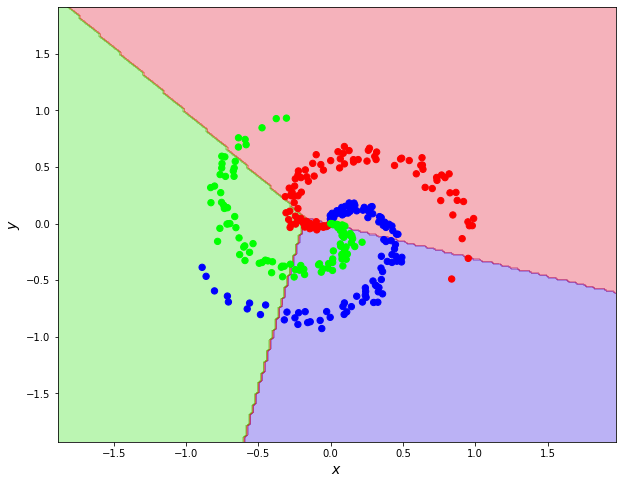

In [87]:
X = X.data.numpy()
y = y.data.numpy()

h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
 
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
grid_tensor = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()])
 
Z = neuron(torch.autograd.Variable(grid_tensor))
Z = Z.data.numpy()
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
 
plt.figure(figsize=(10, 8))
 
plt.contourf(xx, yy, Z, cmap=plt.cm.brg, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.brg)
 
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
 
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.show();